# Introdução

- Calcular harmônicos usando o método de Fourier com média móvel.
- Aplicar o método acima para separar o ruído de um sinal não linear.

## Importando as bibliotecas importantes

In [1]:
# Pacote de cálculo numérico
import numpy as np

# Pacote de plot
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

# Pacote de transformada de Fourier
import scipy as sci

# Pacote de sinais
from scipy import signal

## Funções auxiliares

### Plot

`plot(i,[title,radians,step,figsize,ylabel,xlabel])`

Plota um sinal de forma elegante

**Parâmetros:**  
- i: Array de entrada (array_like)
        
**Opcional:**  
- title: Título da figura (str)
- radians: True (bool)
- step: Passo entre ticks (float)
- figsize: Tamanho da figura (Tuple 1x2)
- ylabel: Amplitude (str)
- xlabel: Tempo (str)

In [2]:
class Plots:
    def __init__(self,i,title='',radians=True,step=1,figsize=(14,4),ylabel='Amplitude',xlabel='Tempo'):
        self.params={"title":title,"radians":radians,"step":step,"figsize":figsize,"xlabel":xlabel,"ylabel":ylabel};
        if isinstance(i,list):
            self.tam=len(i);
        else:
            self.tam=1;
        self.i=i;
    def figure(self):
        figsize=self.params["figsize"]
        if self.tam>1:
            self.fig, self.axs = plt.subplots(self.tam,figsize=(figsize[0],figsize[1]*self.tam))
        else:
            self.fig, self.axs = plt.subplots(figsize=figsize)
    def plotInternal(self,i,ax,title):
        time = np.arange(0,i.size)/T*2*np.pi; 
        self.time = time;
        if self.params["radians"]:
            time/=np.pi;
        dt=time[1]-time[0];
        
        piY=False
        if self.params["radians"]:
            tol=1e-4
            iM=i.max()*100
            im=i.min()*100
            diff = lambda x: abs(np.ceil(x)-x)

            if (diff(iM)>tol and diff(iM*np.pi)<tol) or (diff(im)>tol and diff(im*np.pi)<tol):
                i*=np.pi
                i=np.round(i,4)
                piY=True
        ax.plot(time,i);
        ax.grid(True);
        
        if title!='':
            ax.set_title(title);
        ax.set_xticks(np.arange(0,time[-1]+self.params["step"]+2*dt,self.params["step"]));
        ax.set_xlim(0,time[-1]+dt);
        dmax=i.max()-i.min();
        ax.set_ylim(i.min()-dmax*0.1,i.max()+dmax*0.1);
        ax.set_yticks(np.linspace(i.min(),i.max(),9));
        if self.params["radians"]:
            ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
        if piY:
            ax.yaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
        ax.set_xlabel(self.params["xlabel"]);
        ax.set_ylabel(self.params["ylabel"]);
            
    def plot(self):
        self.figure();
        if self.tam>1:
            titles=self.params["title"]
            for j, ax in enumerate(self.axs):
                self.plotInternal(self.i[j],ax,titles[j]);
            plt.tight_layout();
        else:
            self.plotInternal(self.i,self.axs,self.params["title"])
            
    def plotAll(self):
        p=Plots(ii);
        p.figure();
        p.axs.plot(ii);
        p.axs.plot(np.sqrt(ah**2+bh**2),'--');
            
    def title(self,txt):
        self.fig.suptitle(txt,fontsize=16);
        plt.tight_layout();

In [3]:
def plot(i,title='',tam=1,radians=True,step=1,figsize=(14,4),ylabel='Amplitude',xlabel = 'Tempo'):
    """
    plot(i,[title,radians,step,figsize,ylabel,xlabel]): Plota um sinal de forma elegante
    Parâmetros:
        i: Array de entrada (array_like)
    Opcional:
        title: Título da figura
        radians: True
        step: Passo entre ticks
        figsize: Tamanho da figura
        ylabel: Amplitude
        xlabel: Tempo
    """
    p=Plots(i,title,radians,step,figsize,ylabel,xlabel)
    p.plot()
    return p

### Plotah

`plotah(i,ah,bh,[ph=-5,T=5000])`

Plota um sinal reconstituido em função das suas componentes.

**Parâmetros:**  
- i: Array de entrada (array_like)
- ah: Componente dos cossenos (array_like)
- bh: Componentes dos senos (array_like)

**Opcional:**  
- ph: Fase padrão
- T: Número de pontos por período do sinal a ser processado

In [4]:
def plotah(i,ah,bh,ph=-0.5,T=5000):
    """
    plot(i,[title,radians,step,figsize,ylabel,xlabel]): Plota um sinal de forma elegante
    Parâmetros:
        i: Array de entrada (array_like)
        ah: Componente dos cossenos (array_like)
        bh: Componentes dos senos (array_like)
    Opcional:
        title: Título da figura
        radians: True
        step: Passo entre ticks
        figsize: Tamanho da figura
        ylabel: Amplitude
        xlabel: Tempo
    """
    ii, Ap, phi = coefsin2(ah,bh,T=T)
    p=Plots([ii,i,ah,bh],['$i_i(t)$','$i(t)$','$a_h(t)$','$b_h(t)$']);
    p.plot();
    for j in range(0,2):
        if j==0:
            p.axs[j].plot(p.time,Ap,'--k',label='Envoltória')
            p.axs[j].plot(p.time,-Ap,'--k')
        else:
            border=np.array([np.ones((i.size//4,1)),np.zeros((i.size//4,1)),0.5*np.ones((i.size//4,1)),np.ones((i.size//4,1))])
            p.axs[j].plot(p.time,border.reshape(p.time.shape),'--k',label='Envoltória')
            p.axs[j].plot(p.time,-border.reshape(p.time.shape),'--k')
            
        ax2 = p.axs[j].twinx();
        if j==0:
            ax2.plot(p.time,phi/np.pi,'--r')
        else:
            phase=np.ones((i.size,1))*ph
            ax2.plot(p.time,phase.reshape(p.time.shape),'--r')
        ax2.set_ylabel('Fase (rad)')
        ax2.set_yticks(np.linspace(-1,1,5))
        ax2.tick_params(axis='y', labelcolor='r')
        ax2.set_ylim([-1.1,1.1]);
        ax2.yaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
        
        p.axs[j].legend(loc='best',bbox_to_anchor=p.axs[j].get_position())
    return p

### Movfor2

`movfor2(i,h,[T,N])`

Extrai valores instantâneos dos coeficientes $a_h(k)$ e $b_h(k)$ do harmônico de ordem k do sinal i com T pontos por período e a janela média móvel com N pontos.

Para os cálculos dos coeficientes $a_k(k)$ e $b_h(k)$ a função usa as seguintes expressões:

$$
a_h(k)=a_h(k-1)+\frac{2}{N}\left[i(k)\cos(h\omega k)-i(k-N)\cos(h\omega (k-N))\right]
$$

$$
b_h(k)=b_h(k-1)+\frac{2}{N}\left[i(k)\sin(h\omega k)-i(k-N)\sin(h\omega (k-N))\right]
$$

**Parâmetros:**  
- i: Array de entrada (array_like)
        
**Opcional:**  
- h: Ordem do harmônico a ser calculado (int)
- N: Número de pontos da janela empregada para o cálculo do média móvel
- T: Número de pontos por período do sinal a ser processado

**Saída:**
- a: Compoente instantâneo do cosseno para a harmônica h
- b: Compoente instantâneo do seno para a harmônica h

In [5]:
def movfor2(i,h,T=5000,N=5000):
    """
    movfor2(i,h,[T,N]): Extrai valores instantâneos dos coeficientes a_h e b_h do harmônico de ordem k do sinal i com T pontos por período e a janela média móvel com N pontos.
    Parâmetros: i
        i: Array de entrada (array_like)
    Opcional:
        h: Ordem do harmônico a ser calculado (int)
        N: Número de pontos da janela empregada para o cálculo do média móvel
        T: Número de pontos por período do sinal a ser processado
    """
    
    N=int(N)
    T=int(T)
    
    #Inicializa os vetores a e b
    a=np.zeros((i.size,1));
    b=np.zeros((i.size,1));
    
    # Acrecenta um trecho nulo à série original
    i=np.concatenate([np.zeros((int(N),1)),i])
    
    # Calcula os coeficientes de a e b
    for m in range(0,a.size-1):
        a[m+1]=a[m]+2/N*(i[m+N]*np.cos((m)*2*np.pi*h/T)-i[m]*np.cos((m-N)*2*np.pi*h/T));
        b[m+1]=b[m]+2/N*(i[m+N]*np.sin((m)*2*np.pi*h/T)-i[m]*np.sin((m-N)*2*np.pi*h/T));
        
    return a,b

### Coefisin2

`coefsin2(a,b,[h,T])`

Recompõe o harmônico de ordem $h$ do sinal de coeficientes instantâneos $a_h(t)$ e $b_h(t)$, com $T$ pontos por período.

**Parâmetros:**  
- a: Compoente instantâneo do cosseno para a harmônica h
- b: Compoente instantâneo do seno para a harmônica h 
        
**Opcional:**  
- h: Ordem do harmônico a ser calculado (int)
- T: Número de pontos por período do sinal a ser processado (int)

**Saída:**
- y: Sinal recomposto a partir das harmônicas (array_like)

In [6]:
def coefsin2(a,b,h=1,T=5000):
    """
    coefsin2(a,b,[h,T]): Recompõe o harmônico de ordem h do sinal de coeficientes instantâneos a_h e b_h, com T pontos por período.
    Parâmetros: i
        - a: Compoente instantâneo do cosseno para a harmônica h (array_like)
        - b: Compoente instantâneo do seno para a harmônica h (array_like)
        - y: Sinal recomposto a partir das harmônicas (array_like)
    Opcional:
        h: Ordem do harmônico a ser calculado (int)
        N: Número de pontos da janela empregada para o cálculo do média móvel (int)
    """
    A=np.absolute(a+b*1j)
    phi=np.angle(a-b*1j)
    y=A*np.cos(np.arange(0,a.size).reshape(a.size,1)*2*np.pi*h/T+phi)
    tol=1e-4
    phi[A<tol]=np.NAN
    return y, A, phi

In [7]:
def coefsin1(a,b,h=1,T=5000):
    """
    coefsin2(a,b,[h,T]): Recompõe o harmônico de ordem h do sinal de coeficientes instantâneos a_h e b_h, com T pontos por período.
    Parâmetros: i
        - a: Compoente instantâneo do cosseno para a harmônica h (array_like)
        - b: Compoente instantâneo do seno para a harmônica h (array_like)
        - y: Sinal recomposto a partir das harmônicas (array_like)
    Opcional:
        h: Ordem do harmônico a ser calculado (int)
        N: Número de pontos da janela empregada para o cálculo do média móvel (int)
    """
    A=np.absolute(a+b*1j)
    phi=np.angle(a-b*1j)
    y=A*np.cos(np.arange(0,a.size).reshape(a.size,1)*2*np.pi*h/T+phi)
    tol=1e-4
    return y

### Fours

`fours(i,[k])`

Avalia os primeiros `k` valores da transformada rápida de Fourier (FFT)

**Parâmetros:**  
- i: Sinal
        
**Opcional:**  
- k: Número de harmônicos

**Saída:**
- y: FFT do sinal

In [8]:
def fours(i,k=20):
    f=sci.fft.fft(i/i.size); #Normalizando a FFT
    f=np.r_[(f[0:k]*2).reshape(-1),[0]] #Selecionando as harmônicas
    x=np.arange(0,k+1)
    return x, abs(f)

### Plot_bar

`plot_bar(ax,x,f)`

Plota uma transformada de Fourier considerando o eixo `ax`

**Parâmetros:**  
- ax: Eixo
- x: Frequências
- f: Amplitude
        
**Opcional:**  
- k: Número de harmônicos

**Saída:**
- y: FFT do sinal

In [9]:
def plot_bar(ax,x,f):
    ax.bar(x,f);
    ax.set_xticks(np.arange(0,x.size));
    ax.grid(True);
    ax.set_xlabel('Harmônicas');
    ax.set_ylabel('Amplitude (Normalizada)');

# Método de Fourier com média móvel

A transformada de Fourier pode ser calculada por:

$$
a_k=\frac{2}{T}\int_0^T i(t)\cos(h\omega t)dt
$$

$$
b_k=\frac{2}{T}\int_0^T i(t)\sin(h\omega t)dt
$$

ou seja, $a_k$ indica quanto de cosseno o sinal tem e $b_k$ indica o quanto de seno o sinal tem.

Para os cálculos desses coeficientes em tempo discreto:

$$
a_k(k)=\frac{2}{N}\sum_0^N i(k)\cos(h\omega k)
$$

$$
b_k(k)=\frac{2}{N}\sum_0^N i(k)\sin(h\omega k)
$$

Para otimizar nosso cálculo pode-se utilizar a notação otimizada do Filtro Média Móvel:

$$
i_f(k)=\frac{1}{N}\left[S(k-1)+i(k)-i(k-N)\right]
$$

onde $S(k)$ é a soma de todos os termos do filtro média móvel e $N$ é a ordem do filtro. 

Neste exemplo percebe-se que $S(k)=S(k-1)+i(k)-i(k-N)$, ou seja, **a soma do instante atual é igual a soma do instante anterior mais o valor atual menos o último valor do buffer**. Além disso:

$$
i_f(k-1)=\frac{1}{N}S(k-1)
$$

Logo:

$$
i_f(k)=i_f(k-1)+\frac{1}{N}\left[i(k)-i(k-N)\right]
$$



A função `movfor2()` calcula os coeficientes utilizando o Filtro Média Móvel. Para os cálculos dos coeficientes $a_k(k)$ e $b_h(k)$ a função usa as seguintes expressões:

$$
a_h(k)=a_h(k-1)+\frac{2}{N}\left[i(k)\cos(h\omega k)-i(k-N)\cos(h\omega (k-N))\right]
$$

$$
b_h(k)=b_h(k-1)+\frac{2}{N}\left[i(k)\sin(h\omega k)-i(k-N)\sin(h\omega (k-N))\right]
$$

## Caso 1: Função Seno com N=T=5000

### Passo 1: Plotando o sinal

Definindo o sinal de corrente com a função seno, $i(t)=A(t)\sin(\omega t/T)$:

In [10]:
T = 5000; # Número de amostras

t = np.arange(0,T)/T*2*np.pi; # Definindo o vetor de tempo

S = np.sin(t).reshape(1,T); # Definindo um ciclo da corrente

i = np.array([S, S, 0*S, 0*S, 0.5*S, 0.5*S, S, S])

i = i.reshape(i.size,1)

Plotando $i(t)$:

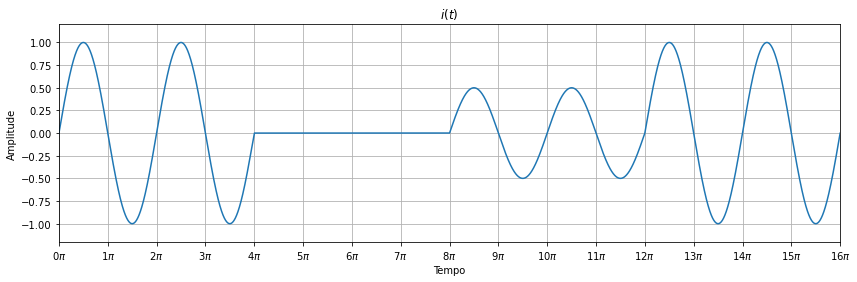

In [11]:
plot(i,title='$i(t)$');

### Passo 2: Calculando as componentes do sinal

Calculando as componentes $a_h(t)$ e $b_h(t)$ usando a função `movfor2()`, para $h=1$:

In [12]:
ah, bh = movfor2(i,h=1,N=T,T=T)

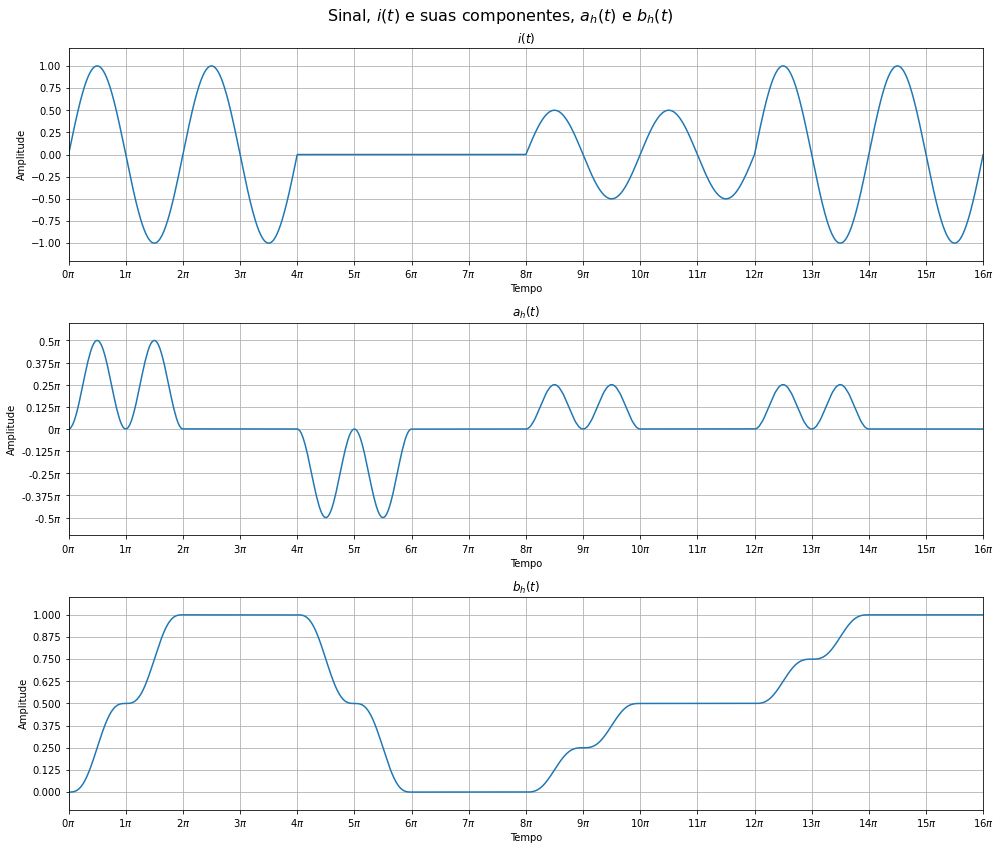

In [13]:
p=plot([i,ah,bh],["$i(t)$","$a_h(t)$","$b_h(t)$"]);
p.title('Sinal, $i(t)$ e suas componentes, $a_h(t)$ e $b_h(t)$');

**Descrição:**

- Intervalo de $t\in [0,4\pi]$: 

No intervalo de $0$ a $2\pi$ o sinal apresentou um transitório em $a_h(t)$ com picos de $0,5\pi$ no tempo de $0,5\pi$ e em $1,5\pi$. Enquanto isso, o sinal de $b_h(t)$ crescia até se estabilizar em 1.

- Intervalo de $4\pi$ a $8\pi$:

No intervalo de $4\pi$ e $6\pi$ houve um transitório similiar ao que ocorreu no intervalo de $0$ a $2\pi$, contudo com o sentido contrário. Os picos em $a_h(k)$ foram negativos com picos de $-0,5\pi$ e a amplitude de $b_h(k)$ descresceu até $0$.

No intervalo de $6\pi$ a $8\pi$ a amplitude de $a_h(t)$ e $b_h(t)$ foram nulas.

- Intervalo de $8\pi$ a $12\pi$:

No intervalo de $8\pi$ a $10\pi$ houve um transitório similar ao que ocorreu no intervalo de $0$ a $2\pi$, porém com amplitude pela metade.

No intervalo de $10\pi$ a $12\pi$ a amplitude de $a_h(t)$ se estabilizou em zero e a amplitude de $b_h(t)$ se estabilizou em $0,5$.

- No intervalo de $12\pi$ a $16\pi$

No intervalo de $12\pi$ a $14\pi$ houve um transitório similar ao que ocorreu no intervalo de $0$ a $\pi$ porém os picos de $a_h(t)$ foram a metade neste intervalo e o valor de $b_h(t)$ houve um crescimento pela metade.

No intervalo de $14\pi$ a $16\pi$ $a_h(t)$ se estabilizou em zero e $b_h(t)$ se estabilizou em $1$.

**Conclusão:**

O sinal é formado apenas por componentes de seno, desta forma espera-se que a amplitude de $b_h(t)$ seja igual a amplitude do sinal. Contudo o Filtro Média Móvel com uma janela de $5000$ amostras apresenta um transitório de $5000$ amostras, ou seja, um transitório de um ciclo.

Desta forma, conclui-se que o Filtro Média Móvel tem **um transitório do tamanho da janela de amotragem**.

### Passo 3: Reconstruindo o sinal através das componentes

In [14]:
ii, Ap, phi = coefsin2(ah,bh)

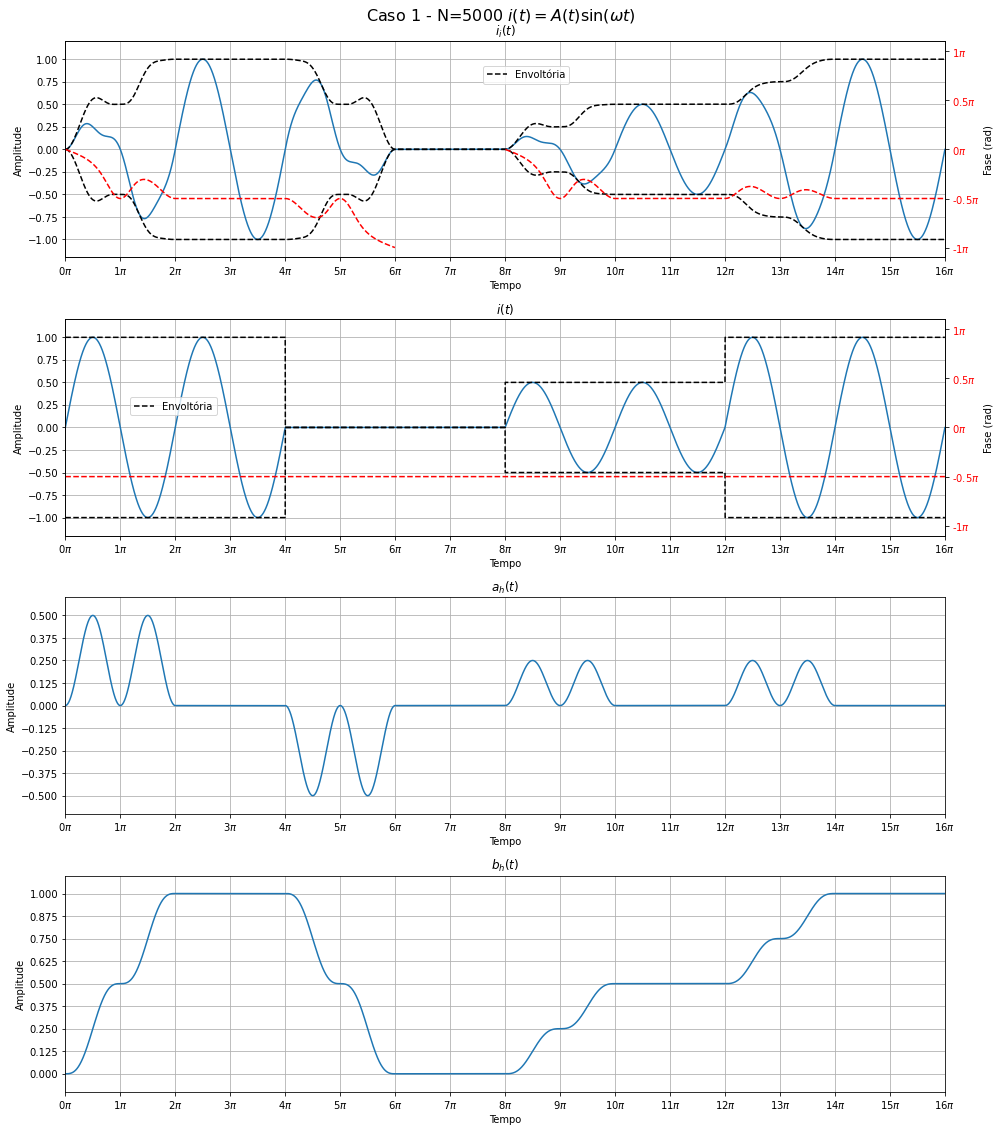

In [15]:
p=plotah(i,ah,bh);
p.title('Caso 1 - N=5000 $i(t)=A(t)\sin(\omega t)$')

Enquanto no sinal original a mudança de amplitude da senoide é instantânea e a fase é sempre $\pi/2$, no sinal reconstrúido a mudança de amplitude e fase passa por um transitório de duração $N$ (Que neste caso é $T$). A amplitude, ou envoltória, do sinal tem o valor de $\pm \sqrt{a_h^2+b_h^2}$ (Ver mais detalhes na função `coefsin2()`).

Durante o transitório houve uma variação da fase (Gráfico em vermelho tracejado), $\tan^{-1}(b_h/a_h)$, que normalmente para o seno é $\pi/2$, porém apresentou valores diferentes no transitório. OBS: Com a amplitude nula o valor da fase é indeterminado, pois caímos num caso de divisão por $0/0$.

## Caso 2: Função Cosseno com N=T=5000

### Passo 1: Plotando o sinal

In [16]:
C = np.cos(t).reshape(1,T); # Definindo um ciclo da corrente

ic = np.array([C, C, 0*C, 0*C, 0.5*C, 0.5*C, C, C])

ic = ic.reshape(ic.size,1)

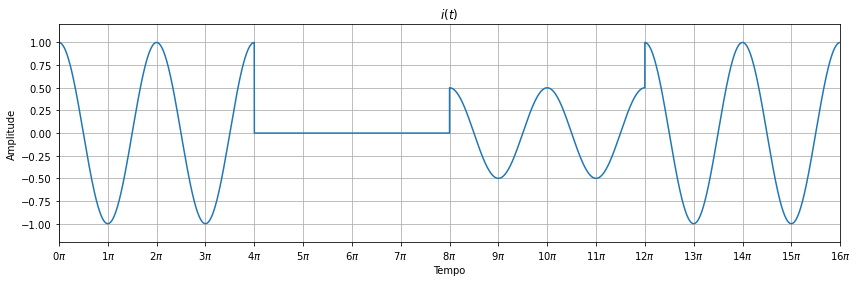

In [17]:
plot(ic,title='$i(t)$');

### Passo 2: Calculando as componentes do sinal

In [18]:
ah, bh = movfor2(ic,h=1,N=T,T=T)

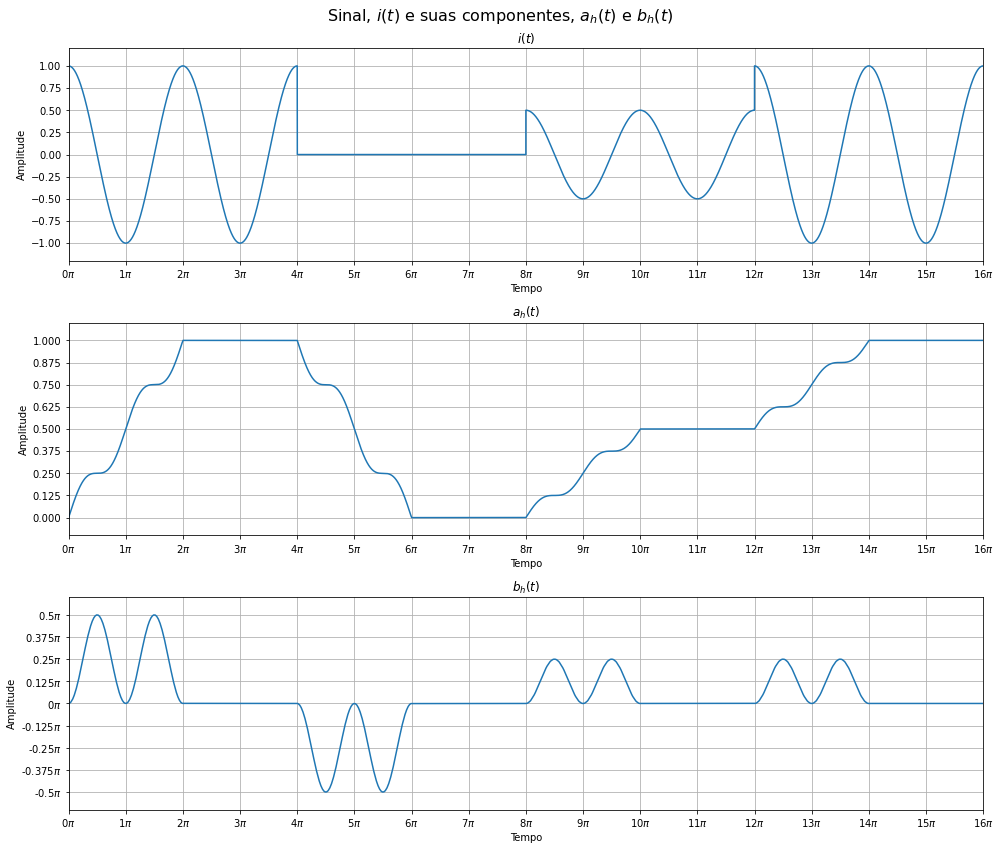

In [19]:
p=plot([ic,ah,bh],["$i(t)$","$a_h(t)$","$b_h(t)$"]);
p.title('Sinal, $i(t)$ e suas componentes, $a_h(t)$ e $b_h(t)$');

### Passo 3: Reconstruindo o sinal atravíes das componentes

In [20]:
iic, Ap, phi = coefsin2(ah,bh)

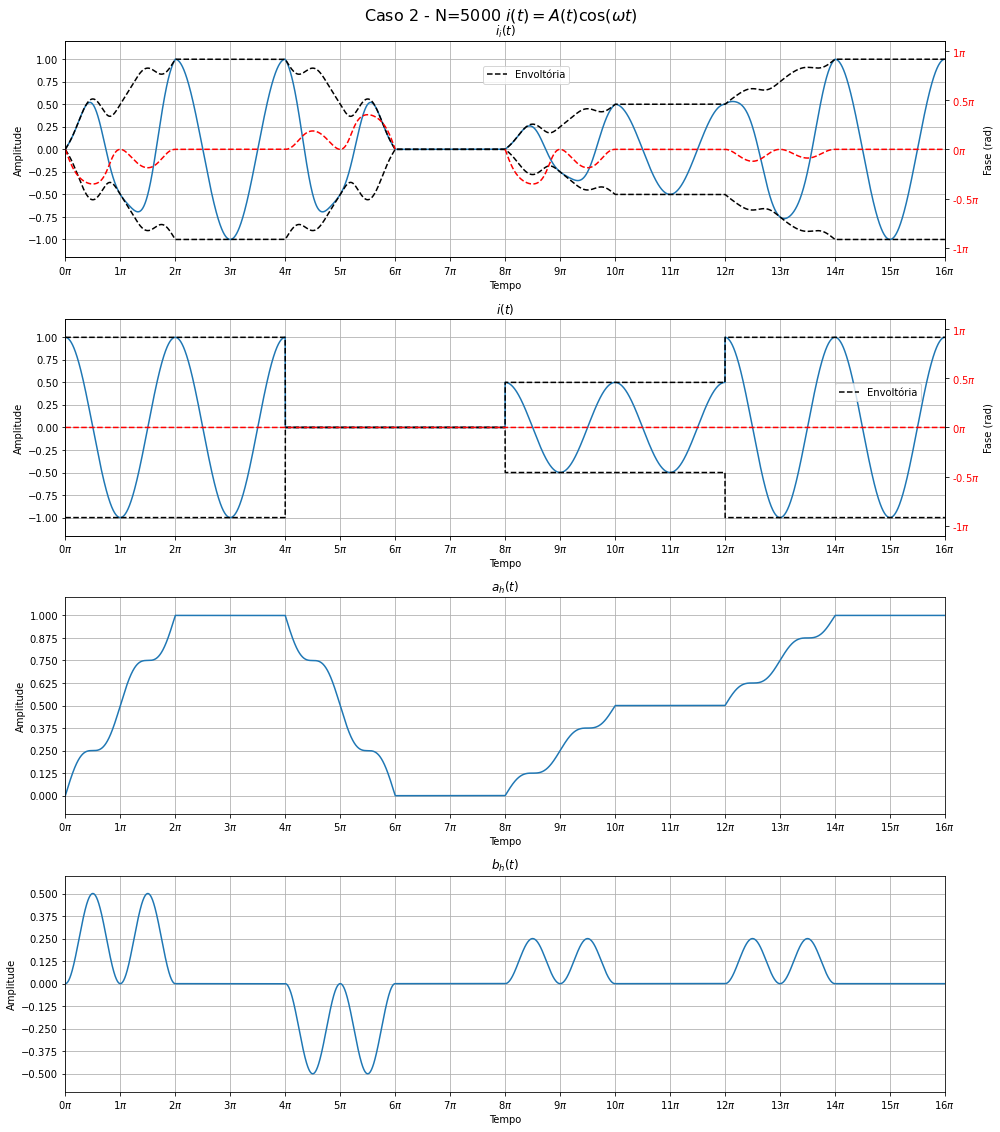

In [21]:
p=plotah(ic,ah,bh,ph=0);
p.title('Caso 2 - N=5000 $i(t)=A(t)\cos(\omega t)$')

## Casos 3 e 4: Função seno e cosseno com N=T/2

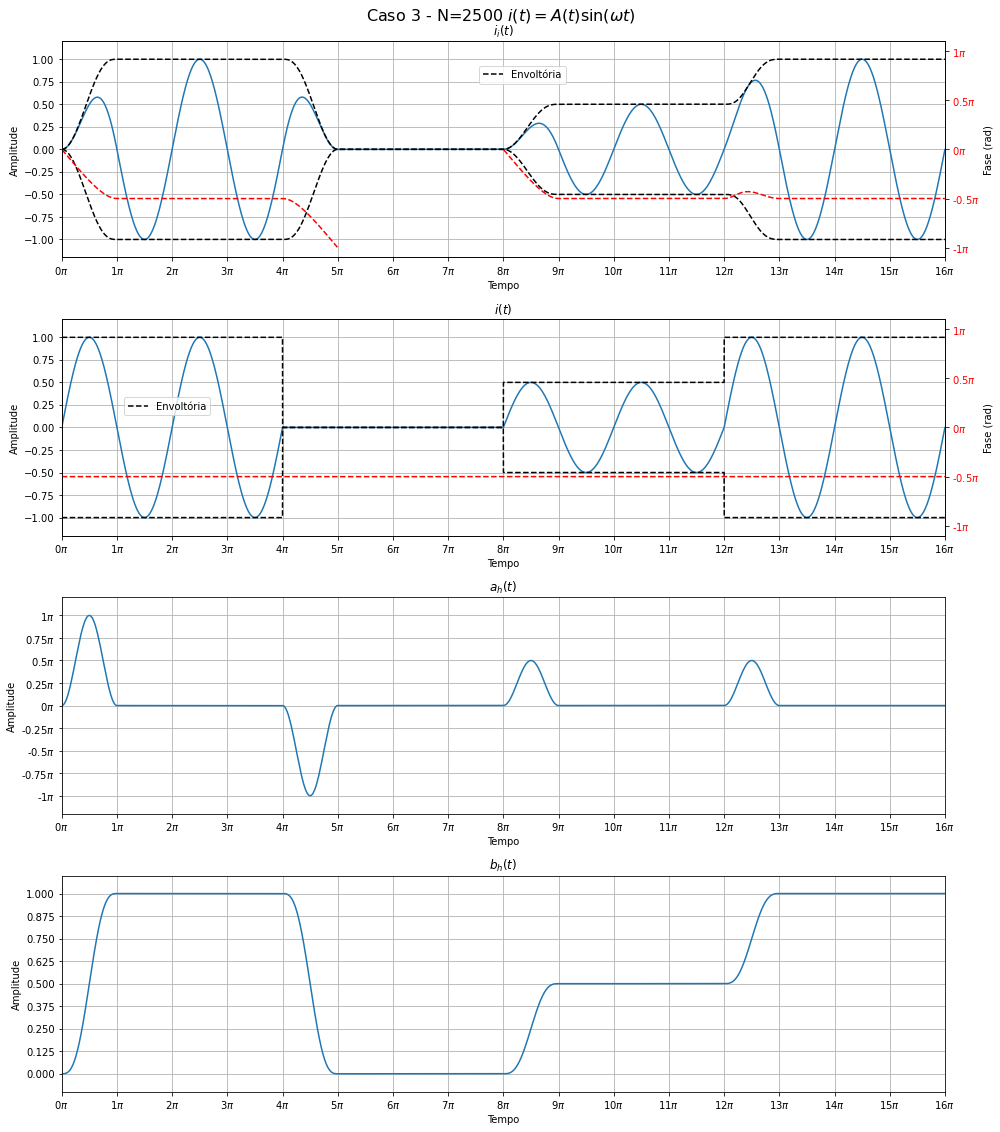

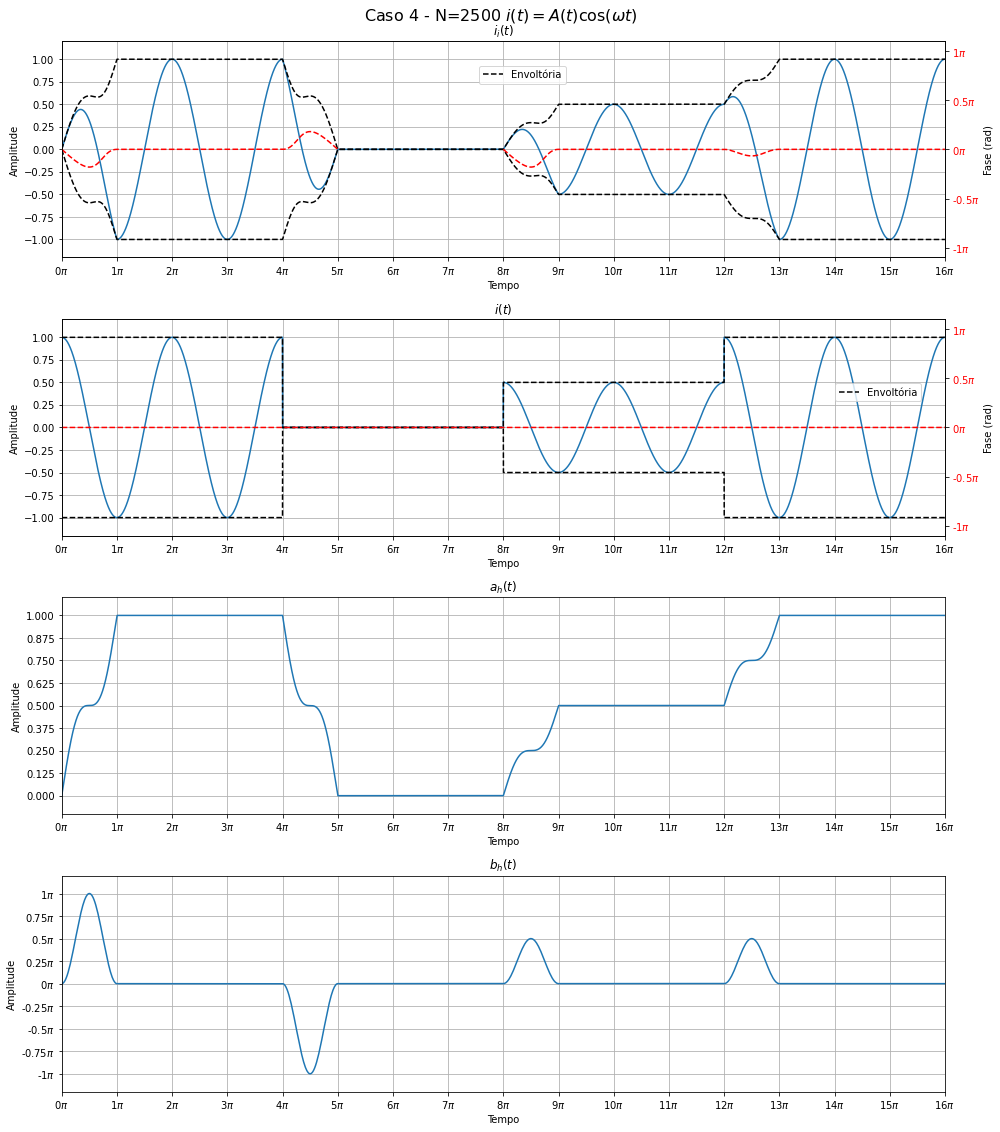

In [22]:
fun=[np.sin,np.cos];
ph=[-0.5,0];
fname=['sin','cos']

iff=list()
iiff=list()

for j, f in enumerate(fun):
    F = f(t).reshape(1,T); # Definindo um ciclo da corrente

    iff.append(np.array([F, F, 0*F, 0*F, 0.5*F, 0.5*F, F, F]))

    iff[j] = iff[j].reshape(iff[j].size,1)
    
    ah, bh = movfor2(iff[j],h=1,N=T//2,T=T)
    
    iiff.append(coefsin1(ah,bh))
    
    p=plotah(iff[j],ah,bh,ph=ph[j]);
    p.title(fr'Caso {j+3} - N=2500 $i(t)=A(t)\{fname[j]}(\omega t)$')

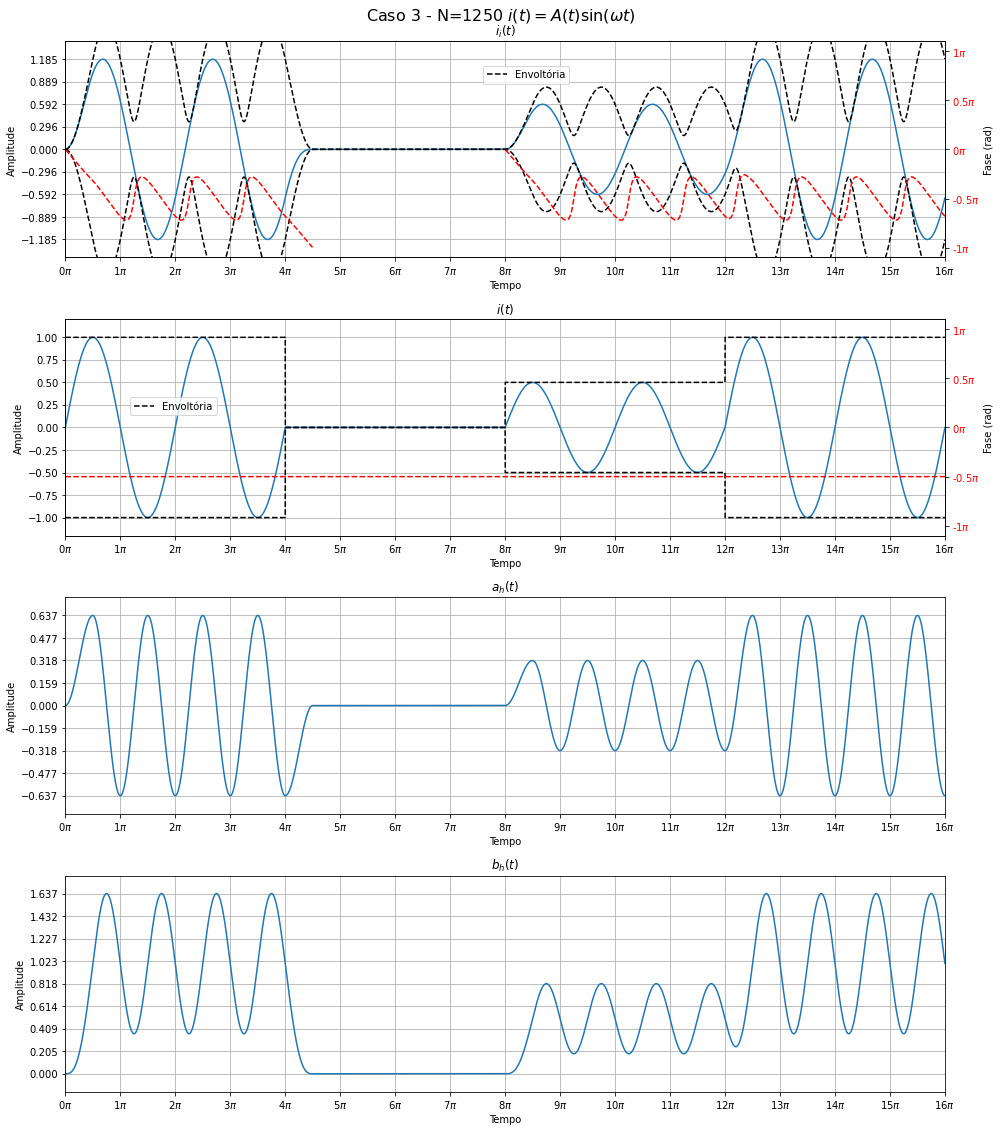

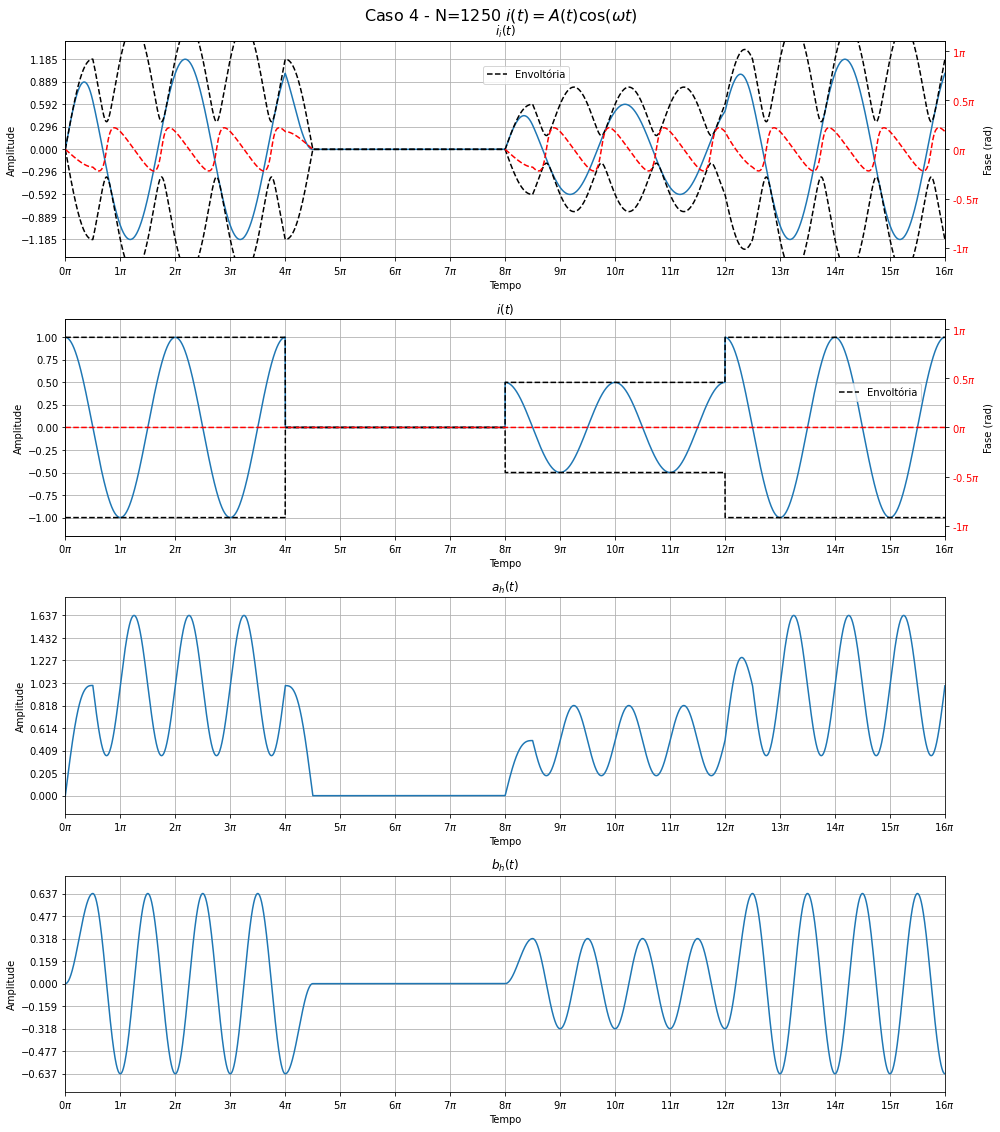

In [23]:
ifff=list()
iifff=list()

for j, f in enumerate(fun):
    F = f(t).reshape(1,T); # Definindo um ciclo da corrente

    ifff.append(np.array([F, F, 0*F, 0*F, 0.5*F, 0.5*F, F, F]))

    ifff[j] = ifff[j].reshape(i.size,1)
    
    ah, bh = movfor2(ifff[j],h=1,N=T//4,T=T)
    
    iifff.append(coefsin1(ah,bh))
    
    p=plotah(ifff[j],ah,bh,ph=ph[j]);
    p.title(fr'Caso {j+3} - N=1250 $i(t)=A(t)\{fname[j]}(\omega t)$')

## Comparando cada caso

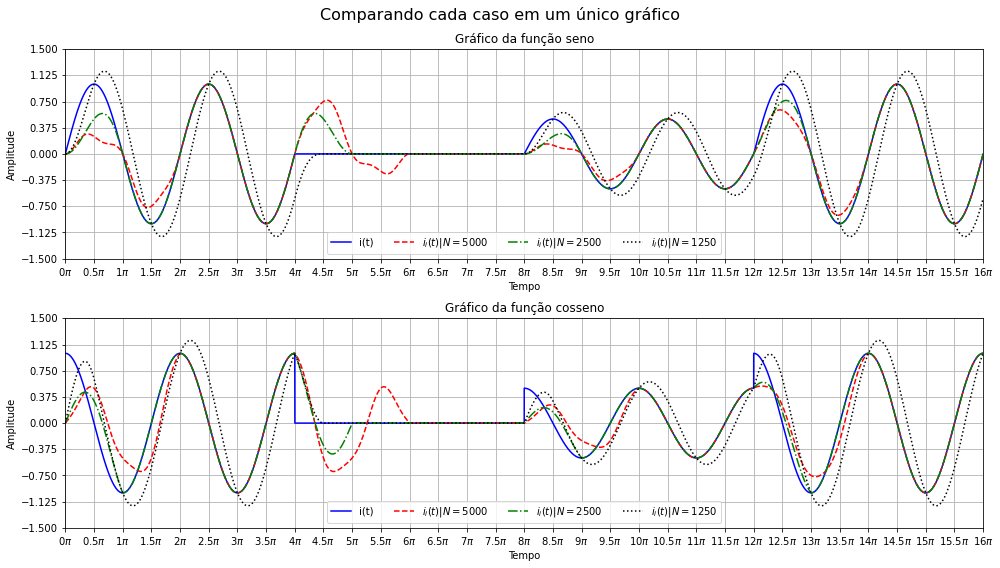

In [24]:
título=['seno','cosseno']

fig, axs = plt.subplots(2,figsize=(14,8));
time = np.arange(0,i.size)/T*2;
dt=time[1]-time[0];

j=0
for j in range(0,2):
    if j==0:
        axs[j].plot(time,i,'b',label='i(t)');
        axs[j].plot(time,ii,'r--',label='$i_i(t) | N=5000$');
        axs[j].plot(time,iiff[j],'g-.',label='$i_i(t) | N=2500$');
        axs[j].plot(time,iifff[j],'k:',label='$i_i(t) | N=1250$');
    else:
        axs[j].plot(time,ic,'b',label='i(t)');
        axs[j].plot(time,iic,'r--',label='$i_i(t) | N=5000$');
        axs[j].plot(time,iiff[j],'g-.',label='$i_i(t) | N=2500$');
        axs[j].plot(time,iifff[j],'k:',label='$i_i(t) | N=1250$');
    axs[j].legend(loc='lower center',ncol=4);

    axs[j].set_title(f'Gráfico da função {título[j]}');
    axs[j].grid(True);
    axs[j].set_xticks(np.arange(0,time[-1]+0.5+2*dt,0.5));
    axs[j].set_xlim(0,time[-1]+dt);
    dmax=i.max()-i.min();
    axs[j].set_ylim(-1.5,1.5);
    axs[j].set_yticks(np.linspace(-1.5,1.5,9));
    axs[j].xaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
    axs[j].set_xlabel('Tempo');
    axs[j].set_ylabel('Amplitude');
fig.suptitle('Comparando cada caso em um único gráfico',fontsize=16);
plt.tight_layout();

Ao reduzir o para $N=T/2=2500$ houve melhoria no transitório (reduziu o tempo pela metade, reduzindo também o número de 'oscilações' pela metade), ao mesmo tempo que o sinal em regime permanente se manteve intacto. Em contrapartida, ao utilizar $N=T/4=1250$, o transitório diminuiu para um quarto, porém o sinal teve distorções e os valores de amplitude $a_h$ e $b_h$ não se mantiveram constantes em regime permanente.

Isso ocorre pois, quando a função $i(t)$ é multiplicada pelo seno/cosseno ($i(t)\cos(\omega t)$ ou $i(t)\sin(\omega t)$) **a frequência do sinal resultante fica igual ao dobro da frequência do sinal original**, $i(t)$, portanto precisa apenas da metade do período do sinal original ($T/2=2500$) para encontrar os valores de $a_h$ e $b_h$.

Contudo com menos de $T/2=2500$ pontos não é possível encontrar os coeficientes de $a_h$ e $b_h$, pois o período analizado é menor que $i(t)\cos(\omega t)$ e/ou $i(t)\sin(\omega t)$. 

Abaixo tem-se a comparação de $i(t)$ e $i(t)\sin(\omega t)$ (Apenas para o caso seno).

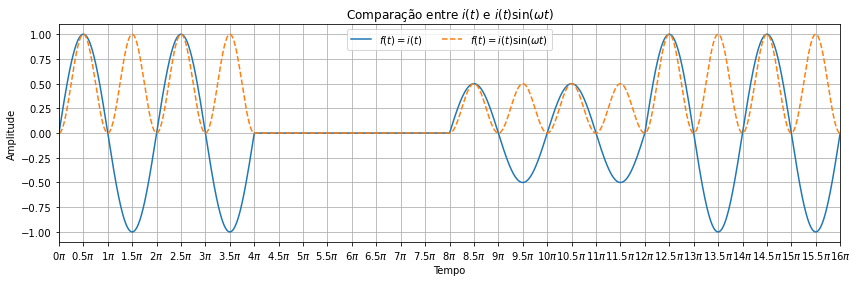

In [25]:
fig, ax = plt.subplots(figsize=(14,4));

ax.plot(time,i,label='$f(t)=i(t)$');
ax.plot(time,i*np.sin(time.reshape(i.shape)*np.pi),'--',label='$f(t)=i(t)\sin(\omega t)$');
ax.legend(ncol=2,loc='upper center');

ax.grid(True);
ax.set_xticks(np.arange(0,time[-1]+0.5+2*dt,0.5));
ax.set_xlim(0,time[-1]+dt);
dmax=i.max()-i.min();
ax.set_ylim(-1.1,1.1);
ax.set_yticks(np.linspace(-1,1,9));
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
ax.set_xlabel('Tempo');
ax.set_ylabel('Amplitude');
ax.set_title('Comparação entre $i(t)$ e $i(t)\sin(\omega t)$');

# Compensação de harmônicos (Filtro ativo)

## Gerar um sinal de teste

### Plotando o sinal

Inicialmente será gerado um sinal de teste $i(t)$ semelhante à corrente de linha de um **retificador trifásico a diodos**. O sinal $i(t)$ será obtido pela soma dos primeiros harmônicos da forma de onda $i(t)$ teórica:

$$
i(t)=\sin(t)-\frac{1}{5}\sin(5t)-\frac{1}{7}\sin(7t)+\frac{1}{11}\sin(11t)+\frac{1}{13}\sin(13t)
$$

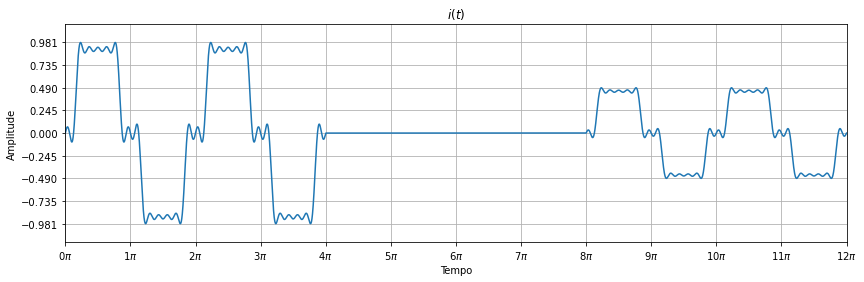

In [26]:
T=1e4; # Período de 10 mil pontos
N=T/2; # Ordem do filtro
t=np.arange(0,T)/T*2*np.pi # Gerando o vetor de tempo
# Definindo o sinal como a soma de harmônicos
S=np.sin(t)-1/5*np.sin(5*t)-1/7*np.sin(7*t)+1/11*np.sin(11*t)+1/13*np.sin(13*t);
# Definindo o sinal em diferentes amplitudes
i=np.array([S, S, 0*S, 0*S, 0.5*S, 0.5*S]);
i = i.reshape(i.size,1)
# Plotando o sinal
plot(i,title='$i(t)$');

### Aplicar Fourier

Vamos calcular $a_h$ e $b_h$ para $h=1,5,7,11,13$ e plotar o resultado:

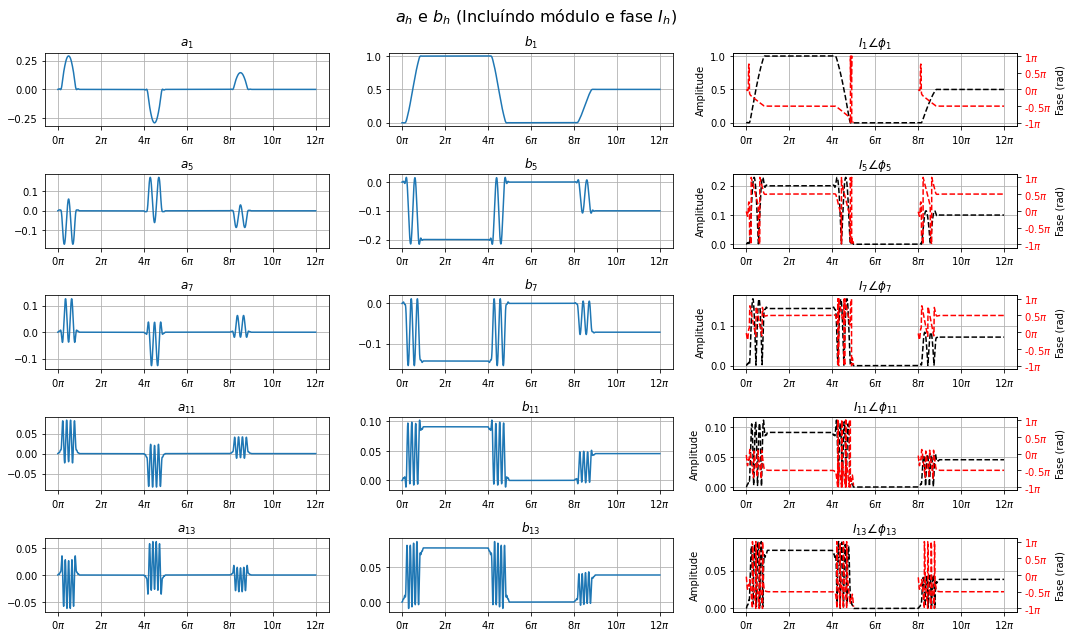

In [27]:
h=np.array([1,5,7,11,13]); # Definindo as harmônicas

# Plotando o resultado
component_name=['a','b']
fig, axs = plt.subplots(h.size,3,figsize=(15,9));
for k in range(h.size):
    ah, bh=movfor2(i,h[k],T,N); #Aplicando fourier
    t=np.linspace(0,T,ah.size)/T*2*6
    for w in range(2):
        if w==0:
            axs[k,0].plot(t,ah)
        else:
            axs[k,1].plot(t,bh)
        axs[k,w].set_title(fr'${component_name[w]}_{{{h[k]}}}$')
        axs[k,w].grid(True);
        axs[k,w].xaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
    # Calculando a amplitude e módulo para o terceiro gráfico
    Ap=np.absolute(ah+bh*1j)
    phi=np.angle(ah-bh*1j)
    tol=1e-4
    phi[Ap<tol]=np.NAN
    # Plotando o terceiro gráfico
    axs[k,2].plot(t,Ap,'--k',label='Módulo')
    # Ajustes
    axs[k,2].set_title(fr'$I_{{{h[k]}}}\angle \phi_{{{h[k]}}}$')
    axs[k,2].grid(True);
    axs[k,2].xaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
    axs[k,2].set_ylabel('Amplitude');
    #Plotando a fase no terceiro gráfico
    ax2 = axs[k,2].twinx();
    ax2.plot(t,phi.reshape(t.shape)/np.pi,'--r')
    #Ajustes
    ax2.set_ylabel('Fase (rad)')
    ax2.set_yticks(np.linspace(-1,1,5))
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim([-1.1,1.1]);
    ax2.yaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
    
fig.suptitle('$a_h$ e $b_h$ (Incluíndo módulo e fase $I_h\angle \phi_h$)',fontsize=16);
fig.tight_layout()

### Reconstruir o sinal através das harmônicas calculadas

Gerando o sinal:

In [28]:
#iih=np.empty([h.size,i.size]);
ii=np.zeros(i.shape)
for k in range(h.size):
    ah, bh=movfor2(i,h[k],T,N); #Aplicando fourier
    iih=coefsin1(ah,bh,h[k],T); #Reconstruindo a componente
    ii+=iih

Plotando o gráfico:

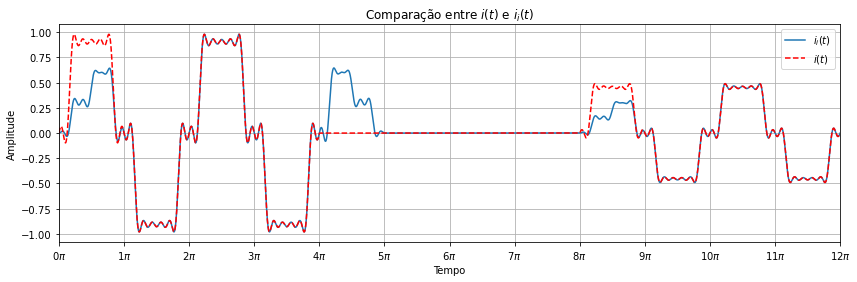

In [29]:
fig, ax = plt.subplots(figsize=(14,4));
ax.plot(t,ii,label='$i_i(t)$');
ax.plot(t,i,'r--',label='$i(t)$')
ax.grid(True);
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g$\pi$'));
ax.set_ylabel('Amplitude');
ax.set_xlabel('Tempo');
ax.set_xlim(0,12);
ax.set_xticks(np.arange(0,12.1,1));
ax.legend();
ax.set_title('Comparação entre $i(t)$ e $i_i(t)$');

No início e toda vez que o sinal original mudou de amplitude houve um transitório de período $\pi$ unidades de tempo para o sinal reconstituído, mais especificamente nos intervalos de $0$ a $\pi$ $4\pi$ a $5\pi$ e $8\pi$ a $9\pi$. Em outras palavras, apenas nestes intervalos o sinal diferiu do sinal original.

## Compensação utilizando um filtro

Para extrair os harmônicos de um determinado sinal não seinodal devemos gerar uma corrente de compensação de:

$$
i_f=-(i(t)-i_1(t))
$$

Ou seja, removemos do sinal original a componente principal.

```mermaid
graph LR
id([i_r]) --> id1(("+")) --> id2([i])
id3([i_f]) --> id1
```

### Encontrar a fundamental

Para encontrar a fundamental podemos utilizar a FFT (`movfor2()`) e reconstruir o sinal (`coefsin1()`):

In [30]:
ah, bh=movfor2(i,h[0],T,N); #Aplicando fourier
i1=coefsin1(ah,bh,h[0],T); #Reconstruindo a fundamental

Vamos obter $i_f(t)$:

In [31]:
i_f=-(i-i1)

Obtendo o sinal filtrado:

In [32]:
i_r=i+i_f

Plotando os gráficos:

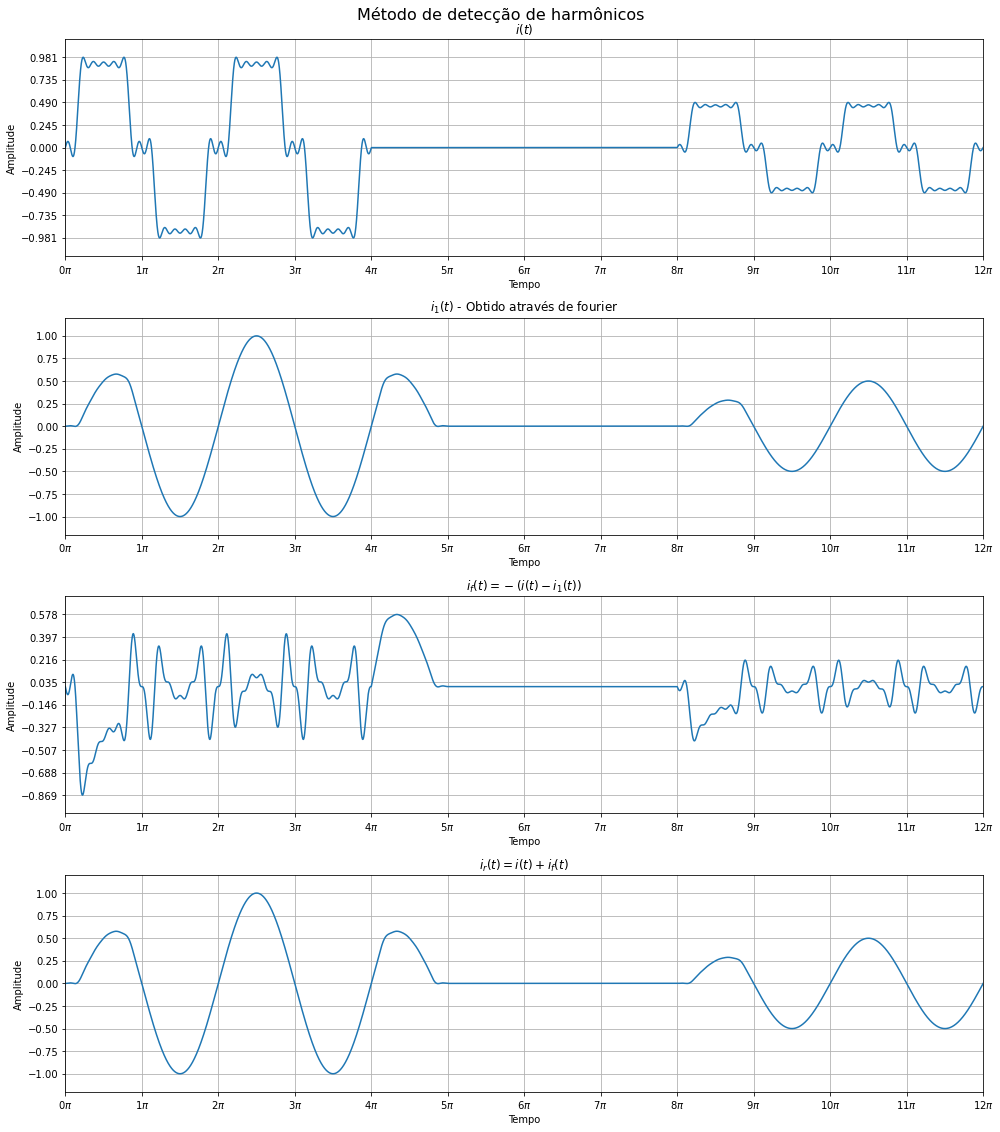

In [33]:
p=Plots([i,i1,i_f,i_r],['$i(t)$','$i_1(t)$ - Obtido através de fourier','$i_f(t)=-(i(t)-i_1(t))$','$i_r(t)=i(t)+i_f(t)$']);
p.plot();
p.title('Método de detecção de harmônicos');

O filtro apresenta um pequeno transitório de período $T$ no ínicio e toda vez que o sinal original mudou de amplitude, porém nos outros intervalos o filtro conseguiu manter a corrente perfeitamente seinodal.

# Análise de escolha de janela incorreta

## Usando a tranformada de Fourier (`movfor2`)

Desta vez vamos gerar um sinal com $T=10000$:

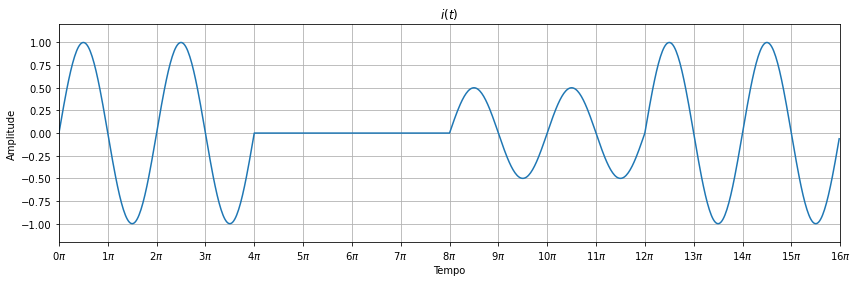

In [34]:
T = 100; # Número de amostras

t = np.arange(0,T)/T*2*np.pi; # Definindo o vetor de tempo

S = np.sin(t).reshape(1,T); # Definindo um ciclo da corrente

i = np.array([S, S, 0*S, 0*S, 0.5*S, 0.5*S, S, S])

i = i.reshape(i.size,1)

# Plotando o sinal
plot(i,title='$i(t)$');

Vamos considerar uma situação onde $N$ é ligeramente diferente de $T$, como $N=0,95T$:

In [35]:
N=0.95*T

ah, bh = movfor2(i,1,T,N);

ii = coefsin1(ah,bh,1,T);

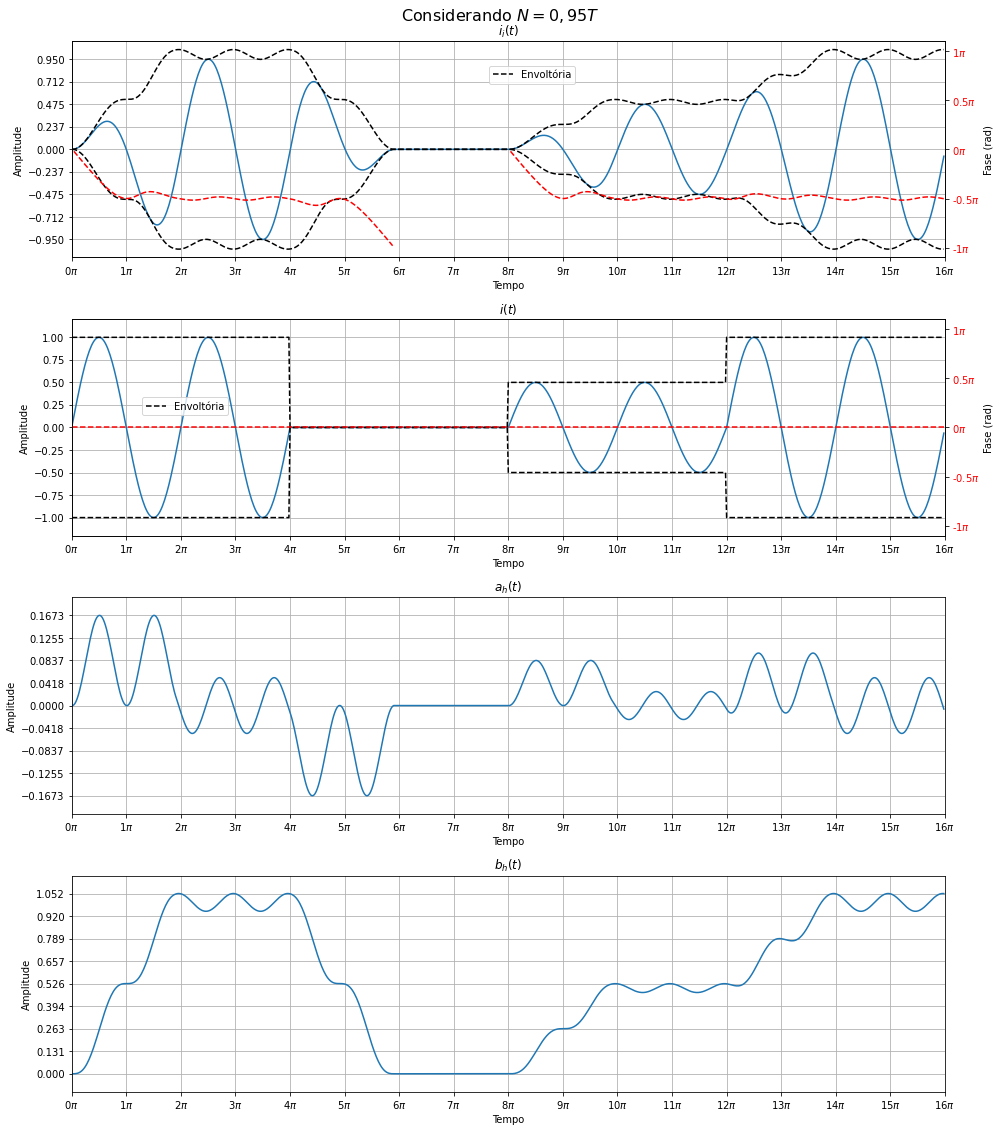

In [36]:
p=plotah(i,ah,bh,ph=0,T=T);
p.title('Considerando $N=0,95T$')

Analisando a figura percebe-se que $a_h$ e e $b_h$ teve oscilações nos intervalos aonde deveria ser um sinal constante (em regime permanente).

**Por que?**

O módulo da transformada rápida de Fourier (FFT) é definido como abaixo:

$$
|f(k)|=\sum_{n=0}^{N-1}x(n)\left|e^{-j2\pi\frac{kn}{N}}\right|=\sum_{n=0}^{N-1}x(n)
$$

Ou ainda:


$$
|f(k)|=S(k-1)+x(k)-x(k-N)\rightarrow |f(k)|=|f(k-1)|+x(k)-x(k-N)
$$

onde $S$ é a soma.

O filtro média móvel é definido como:


$$
i_f(k)=\frac{1}{N}\left[S(k-1)+i(k)-i(k-N)\right]\rightarrow i_f(k)=i_f(k-1)+\frac{1}{N}\left[i(k)-i(k-N)\right]
$$

que tem muita similiraridade com o módulo da FFT, com a diferença que o primeiro é multiplicado pelo fator de $1/N$. Desta forma, **a diferença do módulo da FFT e o filtro média móvel é apenas uma questão de ganho**.

A função de transferência do filtro média móvel é dada por:

$$
H(z^{-1})=\frac{1}{N}\frac{1-z^{-N}}{1-z^{-1}}
$$

Alternativamente podemos escrever a função de transferência da seguinte forma:

$$
H(z^{-1})=\frac{1}{N}\frac{z+z^{-1}+\cdots+z^{-N}}{1}
$$

De forma similar, a função de tranferência da FFT é:

$$
F(z^{-1})=\frac{z+z^{-1}+\cdots+z^{-N}}{1}
$$

ou ainda:

$$
F(z^{-1})=\frac{1-z^{-N}}{1-z^{-1}}
$$

Porém vamos concentrar nosso estudo apenas no filtro média móvel.

Vamos considerar os 3 casos: $N=T$, $N=T/2$ e $N=0,95T$:

In [37]:
Ns=[int(T),int(T/2),int(0.95*T)]

ws = list()
mags = list()
for N in Ns:
    # Definindo o numerador e o denominador do filtro
    b = 1/N*np.ones(N) #Numerador
    a = np.ones(1) #Denominador
    sys = signal.TransferFunction(b,a,dt=1/T);
    w, mag, _ = sys.bode(n=30000);
    ws.append(w)
    mags.append(mag)

Finalmente, plotamos as resposta em frequência para cada janela:

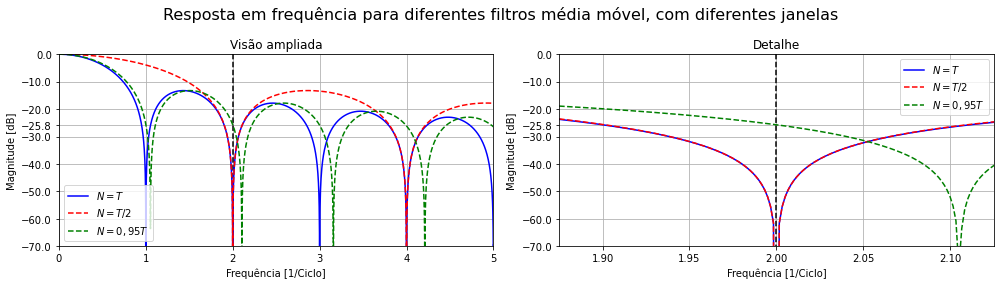

In [38]:
# Calculando a resposta em frequência

fig, axs = plt.subplots(1,2,figsize=[14,4]);
titles=['Visão ampliada','Detalhe'];
labels=['T','T/2','0,95T'];
colors=['b','r--','g--'];
for j, ax in enumerate(axs):
    for k, w in enumerate(ws):
        ax.plot(w/np.pi/2, mags[k],colors[k],label=f'$N={labels[k]}$');
    ax.set_ylabel('Magnitude [dB]');
    ax.set_xlabel('Frequência [1/Ciclo]');
    ax.legend();
    ax.set_yticks(np.sort(np.r_[np.arange(-70,1,10),[-25.8]]));
    ax.grid(True);
    ax.set_ylim(-70,0);
    ax.vlines(2,-80,0,colors='k',linestyles='dashed');
    ax.set_title(titles[j]);
    if j==0:
        axs[j].set_xlim(0,5);
    else:
        delta=0.125
        axs[j].set_xlim(2-delta,2+delta);
fig.suptitle('Resposta em frequência para diferentes filtros média móvel, com diferentes janelas',fontsize=16);
plt.tight_layout();

Observa-se que o filtro média móvel, com $N=T$, tem uma atenuação extremamente elevada (Mais de 140 dB ou maior que $10^7$ em valores absolutos) nas frequências múltimas da frequência do sinal ($2\pi$, $4\pi$, $6\pi$, $8\pi$, etc).

Entretanto a largura de banda da faixa de atenuação é muito estreita. Se for escolhido um valor diferente de $N=T$, ou $N=T/2$, como $N=0,95T$, a frequência de atenuação se desloca, e como a banda de atenuação é muito estreita, o filtro perde bastante o desempenho na frequência em que deve ser atenuada (No caso $4\pi$ para $i(t)\sin(\omega t)$). Na Figura acima, por exemplo, a atenuação foi de apenas $25,8$ dB (Aproximadamente 19,6 em valores absolutos) nesta frequência.

Para a janela de $N=T/2$ a frequência de atenuação, assim como no caso de $N=T$, bate exatamente com a frequência de $i(t)\sin(\omega t)$, portanto não há degradação do filtro para este caso.

# Como seria o conversor?

In [49]:
%load_ext itikz

The itikz extension is already loaded. To reload it, use:
  %reload_ext itikz


In [50]:
import os
# os.environ['ITIKZ_TEMP_DIR'] = '1'

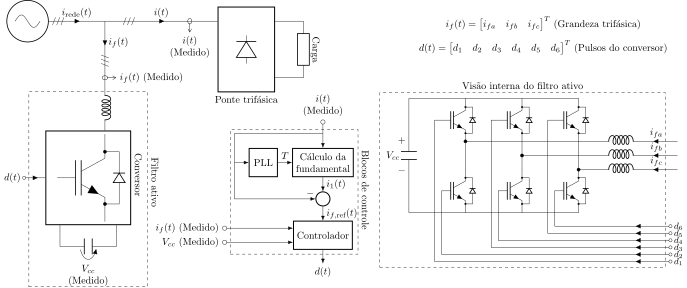

In [51]:
%%itikz --file-prefix circuito --implicit-standalone --temp-dir --tikz-libraries=arrows,fit,shapes.geometric,positioning --tex-packages=amsmath,circuitikz

\begin{tikzpicture}[
        Current/.style={ellipse,draw,inner sep = 0.05cm},
        Block/.style={draw,line width=1,align=center},
        DigitalBlock/.style={Block,minimum size=1cm},
        DigitalArrow/.style={-Latex}]
    % Customizações do Circuitikz
    \ctikzset{bipoles/capacitor/height=0.4}
    \ctikzset{label/align = rotate}
    
    \begin{scope} %Unifilar Diagram
        %% GRID
        \draw (0,0) node[oscillator,scale=1.5] {}
                    node [right] {\footnotesize///}
                    to[short,i=$i_\text{rede}(t)$] ++(2,0) coordinate (PCC);

        %% FILTER
        % Filter Converter
        \draw (PCC) ++(0,-4) node [nigbt,bodydiode,anchor=north east,name=IGBT,scale=2] {};
        \node (CONVERTER) [Block, fit=(IGBT), minimum width=3cm, xshift=0.25cm,
                           label={[rotate=-90,label distance=-1cm,text depth=0.5cm]right:Conversor}] {};
        % Filter Inductor
        \draw (PCC) to[short,i=$i_f(t)$] 
                    node [yshift=-0.25cm,right,rotate=90] {\footnotesize///} 
                    ++(0,-1.5) -- ++(0,-0.75)
                    to[L,name=INDUCTOR] (CONVERTER.north-|PCC);
        % Mensurement
        \draw ($(PCC)-(0,2)$) [-angle 60] node [Current,minimum width=0.2cm] {}
            ++(0.075,0) -- ++(0.325,0) node [right,align=left] {$i_f(t)$ (Medido)};
        % Capacitor
        \draw ($(CONVERTER.south)-(1,0)$) |- ++(0.5,-0.75) 
              to[C,v=$V_{cc}$\\ (Medido),name=CAPACITOR,align=center] ++(1,0) -| ($(CONVERTER.south)+(1,0)$);    
        % Frame
        \node [draw,dashed,fit=(CONVERTER)(CAPACITOR)(INDUCTOR),
               minimum width=4.2cm,minimum height=6.9cm,yshift=-0.5cm,
               label={[rotate=-90,label distance=-1.25cm,text depth=0.5cm]right:Filtro ativo}] {};    
        % Duty terminal
        \draw ($(CONVERTER.west)-(0.75,0)$) node [left] {$d(t)$} to[short,o-,i=$$] (CONVERTER.west);

        %% NON-LINEAR LOAD
        \draw (PCC) ++(4,0) ++(1,-0.5) to[Do,name=DIODE,invert] ++(0,-1);
        \node (BRIDGE) [Block,fit=(DIODE),minimum width=2cm,minimum height=3cm, label=below:Ponte trifásica] {};
        % Load
        \draw ($(BRIDGE.east)+(0,1)$) -| ++(1,-0.25) to[generic=Carga] ++(0,-1.5) |- ($(BRIDGE.east)-(0,1)$); 
        % Meansurement
        \draw (PCC) node [right,xshift=0.5cm] {\footnotesize///} to[short,i=$i(t)$] (BRIDGE.west|-PCC)
              (5,0) [-angle 60] node [Current,minimum height=0.2cm] {}
            ++(0,-0.075) -- ++(0,-0.325) node [below,align=center] {$i(t)$\\(Medido)};
    \end{scope}
    
    \begin{scope}[xshift=7.6cm,yshift=-5cm,node distance=0.5cm]%Sistema de controle
        \node [DigitalBlock] (PLL) {PLL};
        \node [DigitalBlock,right=of PLL] (HARM) {Cálculo da\\fundamental};
        \node [DigitalBlock,below=of HARM,circle,minimum size =0.5cm] (SUM) {};\node at(SUM.north west) [left] {$-$};
        \node [DigitalBlock,below=of SUM] (C) {Controlador};
        \node [above =of HARM,align=center,yshift=0.5cm] (IT) {$i(t)$\\(Medido)};
        \node at($(C.west)+(-2.5,0.25)$) (IF) [align=right,left] {$i_f(t)$ (Medido)};
        \node at($(C.west)+(-2.5,-0.25)$) (VCC) [align=right,left] {$V_{cc}$ (Medido)};
        \coordinate (n2) at($(IT)-(-0,1)$);
        \draw [o-Latex] (IT) -- (HARM);
        \draw [o-Latex] (VCC) -- (C.west|-VCC);
        \draw [DigitalArrow] (n2) --  (PLL.west|-n2) -- ++(-0.5,0) |- coordinate (n3) (PLL);
        \draw [DigitalArrow] (PLL) -- node [above] {$T$} (HARM);
        \draw [DigitalArrow] (n3) |- (SUM);
        \draw [DigitalArrow] (HARM) -- node [right] {$i_1(t)$} (SUM);
        \draw [DigitalArrow] (SUM) -- node[right] {$i_{f,\text{ref}}(t)$} (C);
        \draw [o-Latex] (IF) -- (C.west|-IF);
        \draw [DigitalArrow] (C) -- ++(0,-1) node [below] {$d(t)$};
        \node [draw,dashed,fit=(PLL)(C)(HARM),inner sep=0.4cm,yshift=0.25cm,xshift=-0.25cm,label={[rotate=-90,label distance=-1.6cm,text depth=0.5cm]right:Blocos de controle}] {};
    \end{scope}
    
    \begin{scope}[xshift=12.75cm,yshift=-6cm] %Visão interna do filtro
        \foreach \x/ \fase in {1/a,2/b,3/c}{
            \foreach \y in {0,1}{
                \node at({\x*2},{\y*2.5}) [nigbt,bodydiode,name=igbt\y\fase] {};
                \pgfmathparse{int(\x*2+(\y==0)-1)}\let\num\pgfmathresult
                \draw (igbt\y\fase.B) -- ++({-0.25*\y},0) |- (7,{-2.75+0.5*\x-0.25*(\y==1)}) to[short,-o,i<=$$,name=d\num] ++(2.25,0) node [right] {\small$d_{\num}$};
            }
            \draw (igbt0\fase.C) -- (igbt1\fase.E) ({2*\x},{1.75-(\x-1)*0.5)}) to[short,*-] ++({5-2*(\x-1)},0) to[L] ++(1,0) to [short,i<=$i_{f{\fase}}$] node (if\fase) [xshift=-0.2cm] {} ++(1.5,0);
        }
        \draw (igbt0a.E) -- (igbt0b.E) -- (igbt0c.E) (igbt1a.C) -- (igbt1b.C) -- (igbt1c.C) 
        (igbt0a.E) -| (0,0.25) to[C,v^<=$V_{cc}$, invert,name=Cap,american voltages] ++(0,2) |- (igbt1a.C);
        \node [draw,dashed,fit=(igbt1a)(ifc)(d1)(Cap),inner sep = 0.2cm,label=above:Visão interna do filtro ativo,xshift=-0.55cm] {};
    \end{scope}
    \node at(17.5,-0.5) [align=center] {$i_f(t)=\begin{bmatrix}i_{fa}&i_{fb}&i_{fc}\end{bmatrix}^T$ (Grandeza trifásica)\\\\$d(t)=\begin{bmatrix}d_1&d_2&d_3&d_4&d_5&d_6\end{bmatrix}^T$ (Pulsos do conversor)};%Equações
\end{tikzpicture}

In [52]:
# del os.environ['ITIKZ_TEMP_DIR']

## Usando a FFT do Scipy

Além do erro de janelamento do filtro, a escolha de uma janela de análise diferente pode causar problemas. Para verificar isso iremos utilizar a FFT do Scipy.

Como vamos utilizar a DFT do Scipy, que é muito mais otimizada, podemos utilizar um filtro de ordem mais elevada, seguindo os passos abaixo:

- Gerar a senoide:

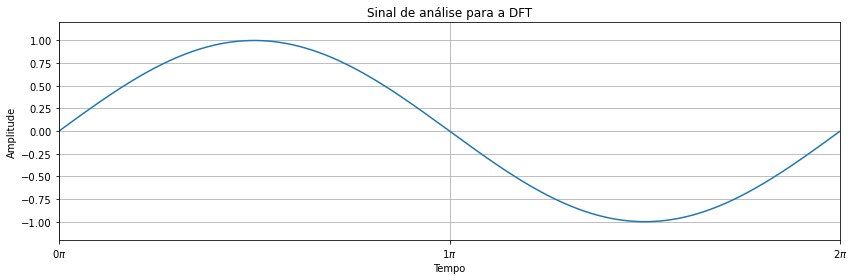

In [43]:
T=1e4
N=T
t=np.arange(0,T)*2*np.pi/T
i=np.sin(t)
plot(i,title='Sinal de análise para a DFT');

- Obter o espectro de frequência do sinal para uma janela de $T=N=10000$:

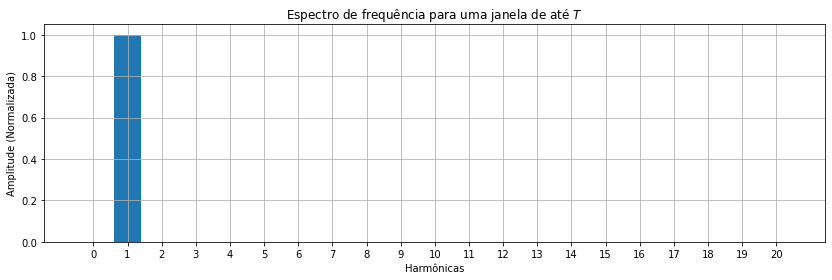

In [44]:
x,f=fours(i);

fig, ax = plt.subplots(figsize=(14,4));
plot_bar(ax,x,f);
ax.set_title('Espectro de frequência para uma janela de até $T$');

- Extrair uma amostra com janela diferente de $T=N=10000$, como até $0,95T$:

In [45]:
ii=i[0:-int(0.05*T)]

- Obter o espectro de frequência do sinal $i_i(t)$:

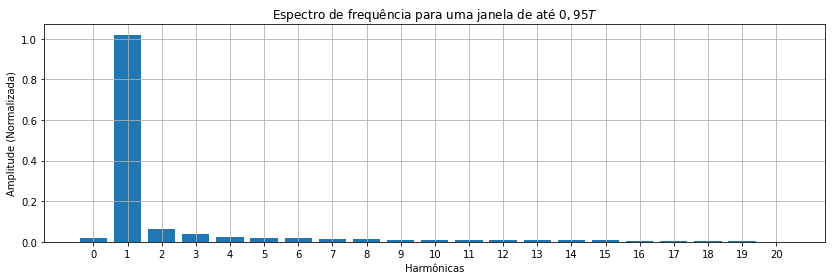

In [46]:
x,f=fours(ii);

fig, ax = plt.subplots(figsize=(14,4));
plot_bar(ax,x,f);
ax.set_title('Espectro de frequência para uma janela de até $0,95T$');

- Variar o tamanho da amostra e analisar o espectro:

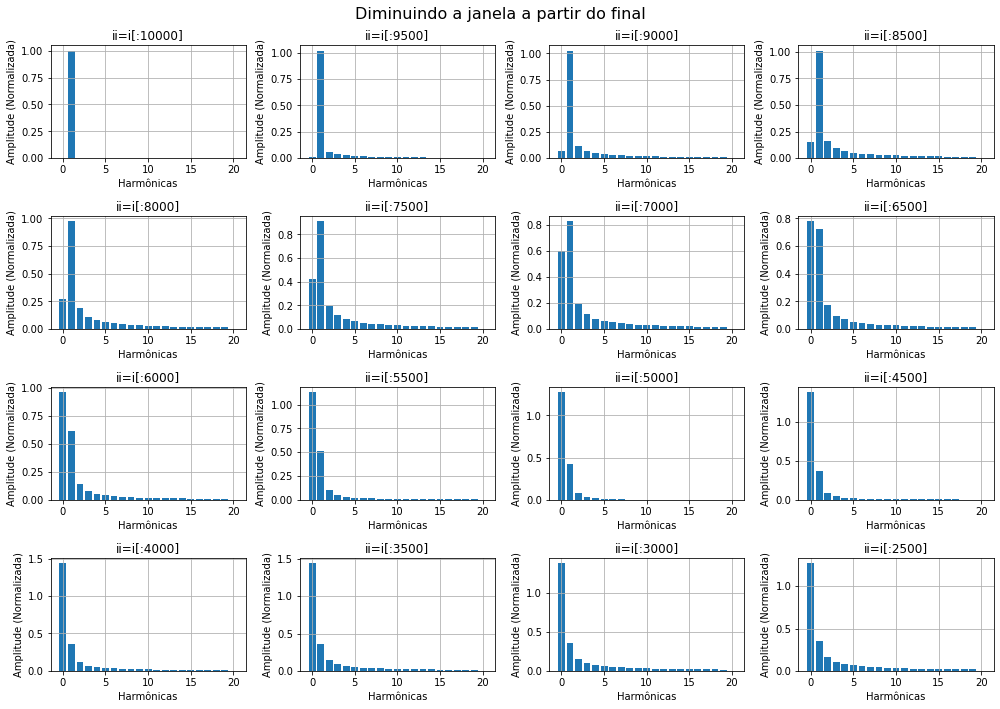

In [47]:
plt.figure(figsize=(14,10));
for k in range(16):
    lim=int(np.round((1-k*0.05)*T))
    ii=i[:lim]
    x,f=fours(ii);
    plt.subplot(4,4,k+1);
    plt.bar(x,f);
    #plt.xticks(np.arange(0,x.size));
    plt.grid(True);
    plt.xlabel('Harmônicas');
    plt.ylabel('Amplitude (Normalizada)');
    plt.title(f'ii=i[:{lim}]')

plt.suptitle('Diminuindo a janela a partir do final',fontsize=16);
plt.tight_layout()

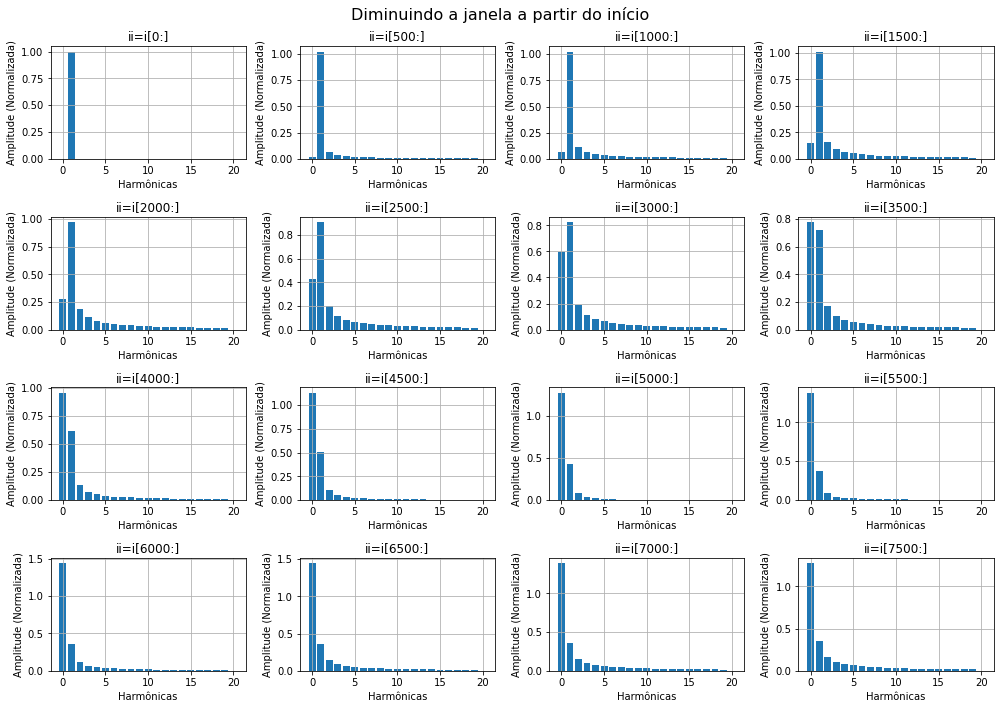

In [48]:
plt.figure(figsize=(14,10));
for k in range(16):
    lim=int(np.round((k*0.05)*T))
    ii=i[lim:]
    x,f=fours(ii);
    plt.subplot(4,4,k+1);
    plt.bar(x,f);
    #plt.xticks(np.arange(0,x.size));
    plt.grid(True);
    plt.xlabel('Harmônicas');
    plt.ylabel('Amplitude (Normalizada)');
    plt.title(f'ii=i[{lim}:]')

plt.suptitle('Diminuindo a janela a partir do início',fontsize=16);
plt.tight_layout()

**Conclusão:**

A medida que a janela diminui, a fundamental começa a diminuir de tamanho enquanto as harmônicas e a componente DC aumentam de tamanho, podendo superar a fundamental, dependendo do tamanho da janela. Isso é válido para a diminuição da janela do início ou do fim do período do sinal.